In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
data = pd.read_csv(r"C:\Users\SURUJ_KALITA\Desktop\7TH-MINIR-PROEJCT-AIR QUALIUTY\Weather-App\GAN-PREPORIOCCESING-DATA\Data.csv")
data

,From Date,SL NO,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,...,Benzene,Eth-Benzene,MP-Xylene,WS,WD,SR,BP,AT,RF,Final
0,2019-02-18 00:00:00,1,58.04,81.06,1.810000,6.400000,9.66000,27.180000,13.770000,0.490000,...,0.920000,3.281917,0.33,1.86,229.44,0.220000,1002.190000,20.87,0.00,1
1,2019-02-18 01:00:00,2,60.00,82.39,1.910000,6.080000,9.70000,26.460000,13.640000,0.440000,...,0.840000,3.281917,0.29,1.54,217.20,1.460000,956.000000,18.92,0.24,1
2,2019-02-18 02:00:00,3,55.50,73.42,2.220000,6.710000,10.86000,27.060000,13.640000,0.440000,...,0.770000,3.281917,0.23,0.66,197.21,241.906008,1001.600000,18.33,0.00,1
3,2019-02-18 03:00:00,4,66.56,96.04,2.790000,7.000000,12.10000,26.340000,13.720000,0.450000,...,0.820000,3.281917,0.21,0.61,206.44,241.906008,1001.410000,17.63,0.00,1
4,2019-02-18 04:00:00,5,67.08,97.21,3.290000,9.450000,15.53000,25.160000,13.800000,0.470000,...,0.740000,3.281917,0.22,0.54,230.53,241.906008,980.670000,16.61,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33062,2022-12-30 20:00:00,33063,295.72,371.83,5.540000,2.620000,5.41000,16.130000,13.910000,2.640000,...,2.960000,3.160000,3.37,0.31,168.12,241.906008,1009.220000,15.96,0.00,1
33063,2022-12-30 21:00:00,33064,362.60,448.50,5.610000,2.620000,5.46000,17.450000,13.880000,2.790000,...,3.120000,3.340000,3.56,0.69,132.27,11.170000,967.180000,14.93,0.48,1
33064,2022-12-30 22:00:00,33065,277.86,353.78,5.520000,2.460000,5.29000,17.920000,13.740000,3.250000,...,3.640000,3.890000,4.15,0.36,173.64,241.906008,1009.110000,15.22,0.00,1
33065,2022-12-30 23:00:00,33066,380.00,450.00,5.460000,2.470000,5.32000,18.010000,14.120000,3.280000,...,3.680000,3.940000,4.21,0.82,163.19,9.570000,912.740000,13.45,1.09,1


In [3]:
df = pd.read_csv(r"C:\Users\SURUJ_KALITA\Desktop\7TH-MINIR-PROEJCT-AIR QUALIUTY\Weather-App\GAN-PREPORIOCCESING-DATA\Data.csv" , index_col='From Date',parse_dates=True)
df

,SL NO,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Eth-Benzene,MP-Xylene,WS,WD,SR,BP,AT,RF,Final
From Date,,,,,,,,,,,,,,,,,,,,
2019-02-18 00:00:00,1,58.04,81.06,1.810000,6.400000,9.66000,27.180000,13.770000,0.490000,15.730000,0.920000,3.281917,0.33,1.86,229.44,0.220000,1002.190000,20.87,0.00,1
2019-02-18 01:00:00,2,60.00,82.39,1.910000,6.080000,9.70000,26.460000,13.640000,0.440000,18.360000,0.840000,3.281917,0.29,1.54,217.20,1.460000,956.000000,18.92,0.24,1
2019-02-18 02:00:00,3,55.50,73.42,2.220000,6.710000,10.86000,27.060000,13.640000,0.440000,34.540000,0.770000,3.281917,0.23,0.66,197.21,241.906008,1001.600000,18.33,0.00,1
2019-02-18 03:00:00,4,66.56,96.04,2.790000,7.000000,12.10000,26.340000,13.720000,0.450000,31.850000,0.820000,3.281917,0.21,0.61,206.44,241.906008,1001.410000,17.63,0.00,1
2019-02-18 04:00:00,5,67.08,97.21,3.290000,9.450000,15.53000,25.160000,13.800000,0.470000,24.070000,0.740000,3.281917,0.22,0.54,230.53,241.906008,980.670000,16.61,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 20:00:00,33063,295.72,371.83,5.540000,2.620000,5.41000,16.130000,13.910000,2.640000,22.820000,2.960000,3.160000,3.37,0.31,168.12,241.906008,1009.220000,15.96,0.00,1
2022-12-30 21:00:00,33064,362.60,448.50,5.610000,2.620000,5.46000,17.450000,13.880000,2.790000,5.660000,3.120000,3.340000,3.56,0.69,132.27,11.170000,967.180000,14.93,0.48,1
2022-12-30 22:00:00,33065,277.86,353.78,5.520000,2.460000,5.29000,17.920000,13.740000,3.250000,22.640000,3.640000,3.890000,4.15,0.36,173.64,241.906008,1009.110000,15.22,0.00,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33067 entries, 2019-02-18 00:00:00 to 2022-12-31 00:00:00
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SL NO        33067 non-null  int64  
 1   PM2.5        33067 non-null  float64
 2   PM10         33067 non-null  float64
 3   NO           33067 non-null  float64
 4   NO2          33067 non-null  float64
 5   Nox          33067 non-null  float64
 6   NH3          33067 non-null  float64
 7   SO2          33067 non-null  float64
 8   CO           33067 non-null  float64
 9   Ozone        33067 non-null  float64
 10  Benzene      33067 non-null  float64
 11  Eth-Benzene  33067 non-null  float64
 12  MP-Xylene    33067 non-null  float64
 13  WS           33067 non-null  float64
 14  WD           33067 non-null  float64
 15  SR           33067 non-null  float64
 16  BP           33067 non-null  float64
 17  AT           33067 non-null  float64
 18  RF         

In [5]:
df.describe()

,SL NO,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Eth-Benzene,MP-Xylene,WS,WD,SR,BP,AT,RF,Final
count,33067.000000,33067.000000,33067.000000,33067.000000,33067.000000,33067.000000,33067.000000,33067.000000,33067.000000,33067.000000,33067.000000,33067.000000,33067.000000,33067.000000,33067.000000,33067.000000,33067.000000,33067.000000,33067.000000,33067.000000
mean,16534.000000,59.371408,110.101254,14.958156,9.816523,23.393050,7.953225,17.190868,0.741765,25.871401,1.259663,3.281917,2.596617,1.123165,153.862123,241.906008,971.844817,24.755675,0.080119,0.430187
std,9545.765012,60.257267,105.795430,25.788262,10.957694,40.174059,6.411978,6.963723,0.666357,18.083600,12.863567,20.795394,20.943704,0.735550,59.055614,187.957259,34.282726,4.936664,0.235498,0.495110
min,1.000000,0.060000,0.500000,0.010000,0.020000,0.000000,0.010000,1.570000,0.000000,0.050000,0.000000,0.010000,0.010000,0.030000,13.950000,0.080000,703.140000,12.000000,0.000000,0.000000
25%,8267.500000,18.900000,34.030000,2.650000,2.690000,5.170000,3.430000,11.710000,0.330000,17.280000,0.000000,0.270000,0.160000,0.550000,103.690000,90.395000,971.844817,21.680000,0.000000,0.000000
50%,16534.000000,39.750000,71.330000,5.420000,5.770000,5.720000,6.110000,15.330000,0.510000,20.060000,0.080000,3.281917,0.590000,0.970000,141.650000,241.906008,971.844817,25.170000,0.000000,0.000000
75%,24800.500000,76.640000,145.500000,14.958156,12.190000,20.645000,10.890000,22.360000,0.920000,26.910000,0.570000,3.281917,2.596617,1.490000,197.085000,256.590000,995.780000,28.180000,0.000000,1.000000
max,33067.000000,450.000000,450.000000,398.610000,80.000000,347.400000,161.060000,80.000000,6.600000,171.290000,491.510000,492.770000,492.770000,23.710000,328.170000,923.260000,1011.810000,38.200000,3.750000,1.000000


In [6]:
# df.drop('SL NO',inplace=True,axis=1)
# # df.drop('Nox',inplace=True, axix = 1)  ##once excuted cant run again

In [7]:
df.head()

,SL NO,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Eth-Benzene,MP-Xylene,WS,WD,SR,BP,AT,RF,Final
From Date,,,,,,,,,,,,,,,,,,,,
2019-02-18 00:00:00,1,58.04,81.06,1.81,6.40,9.66,27.18,13.77,0.49,15.73,0.92,3.281917,0.33,1.86,229.44,0.220000,1002.19,20.87,0.00,1
2019-02-18 01:00:00,2,60.00,82.39,1.91,6.08,9.70,26.46,13.64,0.44,18.36,0.84,3.281917,0.29,1.54,217.20,1.460000,956.00,18.92,0.24,1
2019-02-18 02:00:00,3,55.50,73.42,2.22,6.71,10.86,27.06,13.64,0.44,34.54,0.77,3.281917,0.23,0.66,197.21,241.906008,1001.60,18.33,0.00,1
2019-02-18 03:00:00,4,66.56,96.04,2.79,7.00,12.10,26.34,13.72,0.45,31.85,0.82,3.281917,0.21,0.61,206.44,241.906008,1001.41,17.63,0.00,1
2019-02-18 04:00:00,5,67.08,97.21,3.29,9.45,15.53,25.16,13.80,0.47,24.07,0.74,3.281917,0.22,0.54,230.53,241.906008,980.67,16.61,0.00,1


In [8]:
df['PM2.5'].unique()


array([ 58.04,  60.  ,  55.5 , ..., 362.6 , 277.86, 380.  ])

In [9]:
df['NO2'].unique()

array([6.4 , 6.08, 6.71, ..., 0.77, 0.71, 2.53])

In [10]:
df['SO2'].unique()

array([13.77, 13.64, 13.72, ..., 35.21,  8.61,  5.88])

In [11]:
df['SR'].unique()

array([2.20000000e-01, 1.46000000e+00, 2.41906008e+02, ...,
       4.21590000e+02, 2.79790000e+02, 1.13210000e+02])

In [12]:
df['PM10'].unique()

array([ 81.06,  82.39,  73.42, ..., 371.83, 448.5 , 353.78])

In [13]:
df['AT'].unique()

array([20.87, 18.92, 18.33, ..., 34.95, 34.36, 28.81])

In [14]:
df['RF'].unique()

array([0.        , 0.24      , 0.48      , 0.21      , 0.41      ,
       2.        , 0.45      , 0.26      , 0.22      , 0.04      ,
       0.27      , 0.43      , 0.53      , 0.08011924, 0.23      ,
       0.29      , 0.67      , 0.25      , 0.7       , 0.84      ,
       0.51      , 1.44      , 0.96      , 0.47      , 0.01      ,
       0.69      , 0.46      , 0.65      , 1.93      , 0.36      ,
       2.21      , 0.5       , 1.36      , 1.1       , 0.32      ,
       0.55      , 0.94      , 1.7       , 0.56      , 2.1       ,
       1.16      , 0.58      , 0.87      , 1.66      , 0.15      ,
       0.2       , 0.42      , 1.58      , 0.85      , 1.71      ,
       1.14      , 0.54      , 1.52      , 1.67      , 0.86      ,
       1.33      , 1.77      , 0.17      , 1.29      , 0.02      ,
       0.03      , 0.92      , 0.33      , 0.1       , 0.08      ,
       0.72      , 0.83      , 3.19      , 0.64      , 1.65      ,
       1.69      , 0.19      , 2.88      , 1.88      , 1.02   

In [15]:
df['SR'].unique()

array([2.20000000e-01, 1.46000000e+00, 2.41906008e+02, ...,
       4.21590000e+02, 2.79790000e+02, 1.13210000e+02])

In [16]:
df['BP']=pd.to_numeric(df['BP'])

In [17]:
##rEPACLING NONE values

df=df.replace(['None'],np.NaN)

In [18]:
df['PM2.5']=pd.to_numeric(df['PM2.5'])
df['PM10']=pd.to_numeric(df['PM10'])
df['NO2']=pd.to_numeric(df['NO2'])
df['SO2']=pd.to_numeric(df['SO2'])
df['WS']=pd.to_numeric(df['WS'])
df['WD']=pd.to_numeric(df['WD'])
df['AT']=pd.to_numeric(df['AT'])
df['RF']=pd.to_numeric(df['RF'])
df['SR']=pd.to_numeric(df['SR'])
df['BP']=pd.to_numeric(df['BP'])

In [19]:
df.isnull()

,SL NO,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Eth-Benzene,MP-Xylene,WS,WD,SR,BP,AT,RF,Final
From Date,,,,,,,,,,,,,,,,,,,,
2019-02-18 00:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2019-02-18 01:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2019-02-18 02:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2019-02-18 03:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2019-02-18 04:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 20:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2022-12-30 21:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2022-12-30 22:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
df.isnull().sum()  ##missing values 

SL NO          0
PM2.5          0
PM10           0
NO             0
NO2            0
Nox            0
NH3            0
SO2            0
CO             0
Ozone          0
Benzene        0
Eth-Benzene    0
MP-Xylene      0
WS             0
WD             0
SR             0
BP             0
AT             0
RF             0
Final          0
dtype: int64

In [21]:
#(df==0).sum(axis=0)
def missing_zero_values_table(df):
        zero_val = (df == 0).astype(int).sum(axis=0)
        mz_table = pd.concat([zero_val], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Missing Values'})
        
        return mz_table

missing_zero_values_table(df)

,Missing Values
SL NO,0
PM2.5,0
PM10,0
NO,0
NO2,0
Nox,361
NH3,0
SO2,0
CO,22
Ozone,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33067 entries, 2019-02-18 00:00:00 to 2022-12-31 00:00:00
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SL NO        33067 non-null  int64  
 1   PM2.5        33067 non-null  float64
 2   PM10         33067 non-null  float64
 3   NO           33067 non-null  float64
 4   NO2          33067 non-null  float64
 5   Nox          33067 non-null  float64
 6   NH3          33067 non-null  float64
 7   SO2          33067 non-null  float64
 8   CO           33067 non-null  float64
 9   Ozone        33067 non-null  float64
 10  Benzene      33067 non-null  float64
 11  Eth-Benzene  33067 non-null  float64
 12  MP-Xylene    33067 non-null  float64
 13  WS           33067 non-null  float64
 14  WD           33067 non-null  float64
 15  SR           33067 non-null  float64
 16  BP           33067 non-null  float64
 17  AT           33067 non-null  float64
 18  RF         

In [23]:

df['PM2.5']=df['PM2.5'].fillna(df['PM2.5'].mean())
df['PM10']=df['PM10'].fillna(df['PM10'].mean())
df['NO2']=df['NO2'].fillna(df['NO2'].mean())
df['SO2']=df['SO2'].fillna(df['SO2'].mean())
df['WS']=df['WS'].fillna(df['WS'].mean())
df['WD']=df['WD'].fillna(df['WD'].mean())
df['AT']=df['AT'].fillna(df['AT'].mean())
df['SR']=df['SR'].fillna(df['SR'].mean())
df['BP']=df['BP'].fillna(df['BP'].mean())


In [24]:
df.head()

,SL NO,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Eth-Benzene,MP-Xylene,WS,WD,SR,BP,AT,RF,Final
From Date,,,,,,,,,,,,,,,,,,,,
2019-02-18 00:00:00,1,58.04,81.06,1.81,6.40,9.66,27.18,13.77,0.49,15.73,0.92,3.281917,0.33,1.86,229.44,0.220000,1002.19,20.87,0.00,1
2019-02-18 01:00:00,2,60.00,82.39,1.91,6.08,9.70,26.46,13.64,0.44,18.36,0.84,3.281917,0.29,1.54,217.20,1.460000,956.00,18.92,0.24,1
2019-02-18 02:00:00,3,55.50,73.42,2.22,6.71,10.86,27.06,13.64,0.44,34.54,0.77,3.281917,0.23,0.66,197.21,241.906008,1001.60,18.33,0.00,1
2019-02-18 03:00:00,4,66.56,96.04,2.79,7.00,12.10,26.34,13.72,0.45,31.85,0.82,3.281917,0.21,0.61,206.44,241.906008,1001.41,17.63,0.00,1
2019-02-18 04:00:00,5,67.08,97.21,3.29,9.45,15.53,25.16,13.80,0.47,24.07,0.74,3.281917,0.22,0.54,230.53,241.906008,980.67,16.61,0.00,1


In [25]:
(df==0).sum(axis=0)

SL NO              0
PM2.5              0
PM10               0
NO                 0
NO2                0
Nox              361
NH3                0
SO2                0
CO                22
Ozone              0
Benzene         9966
Eth-Benzene        0
MP-Xylene          0
WS                 0
WD                 0
SR                 0
BP                 0
AT                 0
RF             26730
Final          18842
dtype: int64

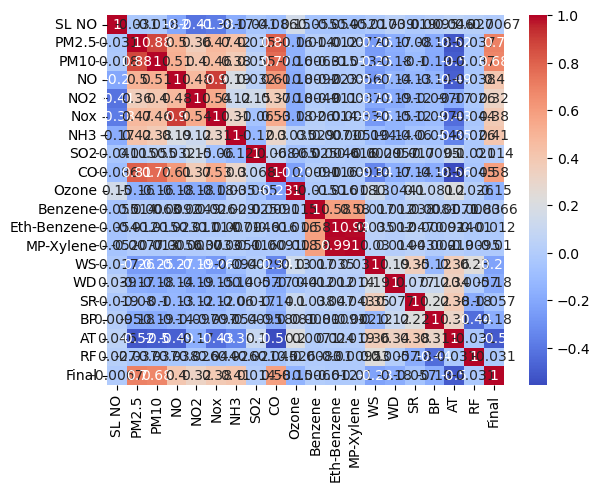

In [26]:
corrmat=df.corr()  ##Correlation mapping seaborn heatmap
sns.heatmap(corrmat,annot=True,cmap='coolwarm')
plt.show()


<Axes: >

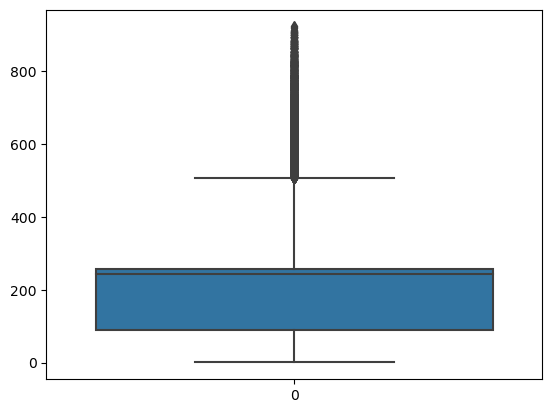

In [27]:
#checking outliers
sns.boxplot(df['SR'])

In [28]:
df1=df['PM10']   ##pm10 column


In [29]:
def findoutliers(df1):
    q1=df1.quantile(0.25)
    q3=df1.quantile(0.75)
    IQR=q3-q1
    outliers=df1[((df1<q1-1.5*IQR)|(df1>q3+1.5*IQR))]
    return outliers

In [30]:
df

,SL NO,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Eth-Benzene,MP-Xylene,WS,WD,SR,BP,AT,RF,Final
From Date,,,,,,,,,,,,,,,,,,,,
2019-02-18 00:00:00,1,58.04,81.06,1.810000,6.400000,9.66000,27.180000,13.770000,0.490000,15.730000,0.920000,3.281917,0.33,1.86,229.44,0.220000,1002.190000,20.87,0.00,1
2019-02-18 01:00:00,2,60.00,82.39,1.910000,6.080000,9.70000,26.460000,13.640000,0.440000,18.360000,0.840000,3.281917,0.29,1.54,217.20,1.460000,956.000000,18.92,0.24,1
2019-02-18 02:00:00,3,55.50,73.42,2.220000,6.710000,10.86000,27.060000,13.640000,0.440000,34.540000,0.770000,3.281917,0.23,0.66,197.21,241.906008,1001.600000,18.33,0.00,1
2019-02-18 03:00:00,4,66.56,96.04,2.790000,7.000000,12.10000,26.340000,13.720000,0.450000,31.850000,0.820000,3.281917,0.21,0.61,206.44,241.906008,1001.410000,17.63,0.00,1
2019-02-18 04:00:00,5,67.08,97.21,3.290000,9.450000,15.53000,25.160000,13.800000,0.470000,24.070000,0.740000,3.281917,0.22,0.54,230.53,241.906008,980.670000,16.61,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 20:00:00,33063,295.72,371.83,5.540000,2.620000,5.41000,16.130000,13.910000,2.640000,22.820000,2.960000,3.160000,3.37,0.31,168.12,241.906008,1009.220000,15.96,0.00,1
2022-12-30 21:00:00,33064,362.60,448.50,5.610000,2.620000,5.46000,17.450000,13.880000,2.790000,5.660000,3.120000,3.340000,3.56,0.69,132.27,11.170000,967.180000,14.93,0.48,1
2022-12-30 22:00:00,33065,277.86,353.78,5.520000,2.460000,5.29000,17.920000,13.740000,3.250000,22.640000,3.640000,3.890000,4.15,0.36,173.64,241.906008,1009.110000,15.22,0.00,1


In [31]:
outliers=findoutliers(df['PM10'])
print("no of outliers"+str(len(outliers)))
print("max outlier value "+str(outliers.max()))
print("min outlier value "+str(outliers.min()))


no of outliers2368
max outlier value 450.0
min outlier value 312.75


In [32]:
df1   ##PM10

From Date
2019-02-18 00:00:00     81.06
2019-02-18 01:00:00     82.39
2019-02-18 02:00:00     73.42
2019-02-18 03:00:00     96.04
2019-02-18 04:00:00     97.21
                        ...  
2022-12-30 20:00:00    371.83
2022-12-30 21:00:00    448.50
2022-12-30 22:00:00    353.78
2022-12-30 23:00:00    450.00
2022-12-31 00:00:00    389.00
Name: PM10, Length: 33067, dtype: float64

In [33]:
q3=df1.quantile(0.75)
q1=df1.quantile(0.25)
IQR=q3-q1
r=q3+1.5*IQR
df1[df1>r]

##Outlier Removing


From Date
2019-02-21 19:00:00    438.48
2019-02-21 20:00:00    440.13
2019-02-21 21:00:00    331.37
2019-02-21 22:00:00    351.45
2019-02-21 23:00:00    327.00
                        ...  
2022-12-30 20:00:00    371.83
2022-12-30 21:00:00    448.50
2022-12-30 22:00:00    353.78
2022-12-30 23:00:00    450.00
2022-12-31 00:00:00    389.00
Name: PM10, Length: 2368, dtype: float64

In [34]:
len(df1[df1>450])

0

In [35]:
r=450
df['PM10']=np.where(df['PM10']>r,r,df['PM10'])

In [36]:
df['PM10'].describe()

count    33067.000000
mean       110.101254
std        105.795430
min          0.500000
25%         34.030000
50%         71.330000
75%        145.500000
max        450.000000
Name: PM10, dtype: float64

In [37]:
outliers=findoutliers(df['PM10'])
print("no of outliers "+str(len(outliers)))
print("max outlier value "+str(outliers.max()))
print("min outlier value "+str(outliers.min()))

no of outliers 2368
max outlier value 450.0
min outlier value 312.75


<Axes: >

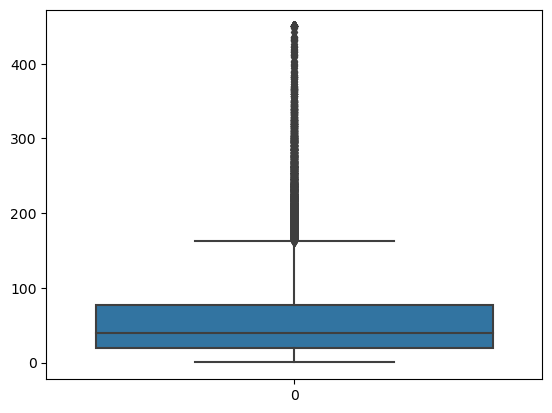

In [38]:
sns.boxplot(df['PM2.5'])

In [39]:
outliers=findoutliers(df['PM2.5'])
print("no of outliers"+str(len(outliers)))
print("max outlier value "+str(outliers.max()))
print("min outlier value "+str(outliers.min()))


no of outliers2144
max outlier value 450.0
min outlier value 163.28


In [40]:
df2=df['PM2.5']


In [41]:
q3=df2.quantile(0.75)
q1=df2.quantile(0.25)
IQR=q3-q1
r=q3+1.5*IQR
df2[df2>r]

From Date
2019-02-21 19:00:00    260.10
2019-02-21 20:00:00    263.81
2019-02-21 21:00:00    203.58
2019-02-21 22:00:00    217.14
2019-02-21 23:00:00    194.00
                        ...  
2022-12-30 20:00:00    295.72
2022-12-30 21:00:00    362.60
2022-12-30 22:00:00    277.86
2022-12-30 23:00:00    380.00
2022-12-31 00:00:00    295.00
Name: PM2.5, Length: 2144, dtype: float64

In [42]:
len(df2[df2>450])

0

In [43]:
r=450
df['PM2.5']=np.where(df['PM2.5']>r,r,df['PM2.5'])

#r = 450: This sets the value of r to 450, which is the maximum value you want to use to cap the 
#'PM2.5' column.

In [44]:
df['PM2.5'].describe()

count    33067.000000
mean        59.371408
std         60.257267
min          0.060000
25%         18.900000
50%         39.750000
75%         76.640000
max        450.000000
Name: PM2.5, dtype: float64

<Axes: >

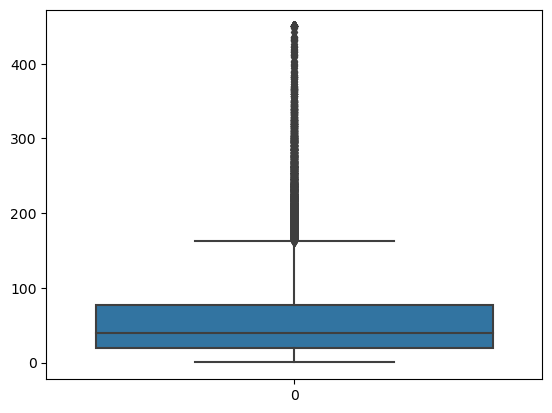

In [45]:
sns.boxplot(df['PM2.5'])

<Axes: >

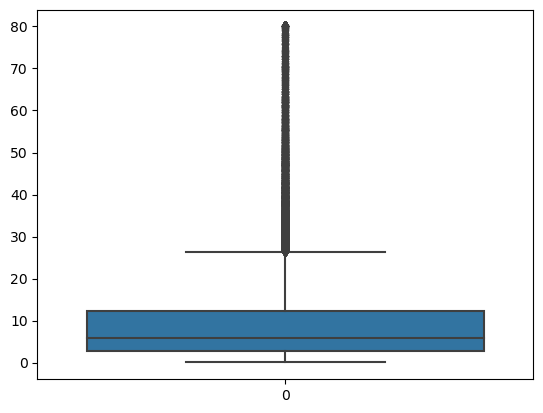

In [46]:
sns.boxplot(df['NO2'])

In [47]:
outliers=findoutliers(df['NO2'])
print("no of outliers"+str(len(outliers)))
print("max outlier value "+str(outliers.max()))
print("min outlier value "+str(outliers.min()))


no of outliers2297
max outlier value 80.0
min outlier value 26.44


In [48]:
df3=df['NO2']


In [49]:
q3=df3.quantile(0.75)
q1=df3.quantile(0.25)
IQR=q3-q1
r=q3+1.5*IQR
df3[df3>r]  

##Removing outiers

From Date
2019-02-20 20:00:00    30.09
2019-02-21 18:00:00    32.60
2019-02-21 19:00:00    35.39
2019-02-21 20:00:00    31.88
2019-02-22 12:00:00    28.63
                       ...  
2021-04-30 18:00:00    44.28
2021-04-30 19:00:00    45.46
2021-05-02 21:00:00    37.77
2021-05-02 22:00:00    40.99
2021-05-02 23:00:00    34.23
Name: NO2, Length: 2297, dtype: float64

In [50]:
len(df3[df3>80])

0

In [51]:
r=80
df['NO2']=np.where(df['NO2']>r,r,df['NO2'])

#r = 450: This sets the value of r to 450, which is the maximum value you want to use to cap the 'PM2.5' column.

In [52]:
df['NO2'].describe()

count    33067.000000
mean         9.816523
std         10.957694
min          0.020000
25%          2.690000
50%          5.770000
75%         12.190000
max         80.000000
Name: NO2, dtype: float64

<Axes: >

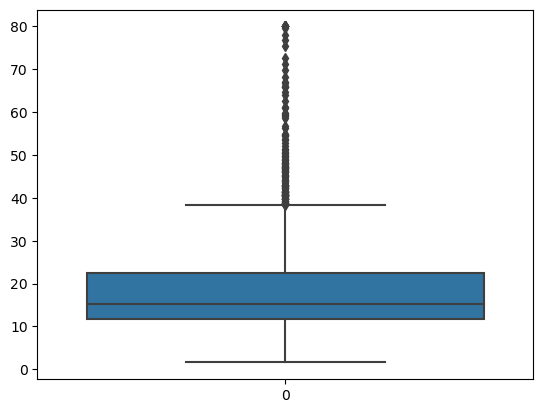

In [53]:
sns.boxplot(df['SO2'])


In [54]:

df4=df['SO2']

In [55]:

r=80
df['SO2']=np.where(df['SO2']>r,r,df['SO2'])

<Axes: >

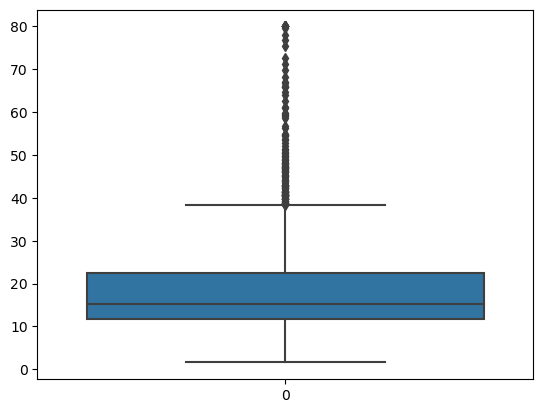

In [56]:
sns.boxplot(df['SO2'])

<Axes: >

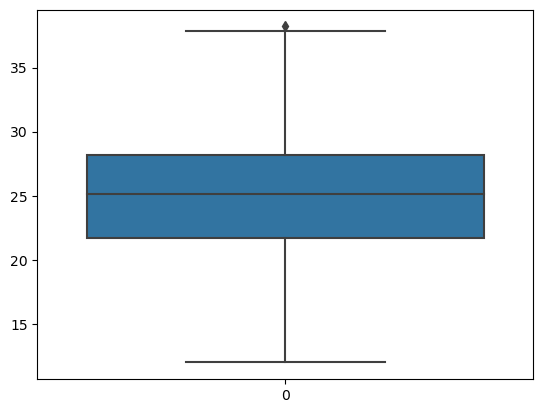

In [57]:

sns.boxplot(df['AT'])

In [58]:
r=12
df['AT']=np.where(df['AT']<r,r,df['AT'])

<Axes: >

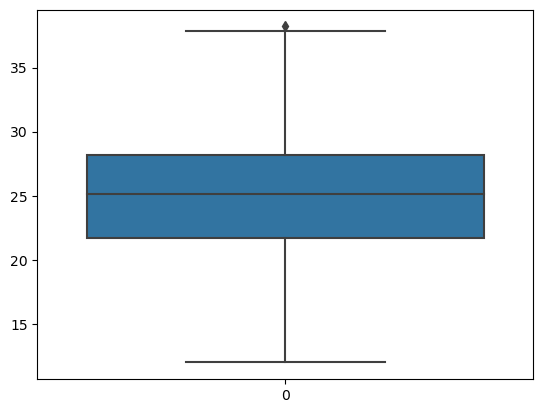

In [59]:
sns.boxplot(df['AT'])

In [60]:
df.head()

,SL NO,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Eth-Benzene,MP-Xylene,WS,WD,SR,BP,AT,RF,Final
From Date,,,,,,,,,,,,,,,,,,,,
2019-02-18 00:00:00,1,58.04,81.06,1.81,6.40,9.66,27.18,13.77,0.49,15.73,0.92,3.281917,0.33,1.86,229.44,0.220000,1002.19,20.87,0.00,1
2019-02-18 01:00:00,2,60.00,82.39,1.91,6.08,9.70,26.46,13.64,0.44,18.36,0.84,3.281917,0.29,1.54,217.20,1.460000,956.00,18.92,0.24,1
2019-02-18 02:00:00,3,55.50,73.42,2.22,6.71,10.86,27.06,13.64,0.44,34.54,0.77,3.281917,0.23,0.66,197.21,241.906008,1001.60,18.33,0.00,1
2019-02-18 03:00:00,4,66.56,96.04,2.79,7.00,12.10,26.34,13.72,0.45,31.85,0.82,3.281917,0.21,0.61,206.44,241.906008,1001.41,17.63,0.00,1
2019-02-18 04:00:00,5,67.08,97.21,3.29,9.45,15.53,25.16,13.80,0.47,24.07,0.74,3.281917,0.22,0.54,230.53,241.906008,980.67,16.61,0.00,1


In [61]:
df.shape
## rows and column 

(33067, 20)

In [62]:
# https://www.kaggle.com/code/ttunjic/gans-for-tabular-data

##ON CENSUS DATASETS

In [63]:
df

,SL NO,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Eth-Benzene,MP-Xylene,WS,WD,SR,BP,AT,RF,Final
From Date,,,,,,,,,,,,,,,,,,,,
2019-02-18 00:00:00,1,58.04,81.06,1.810000,6.400000,9.66000,27.180000,13.770000,0.490000,15.730000,0.920000,3.281917,0.33,1.86,229.44,0.220000,1002.190000,20.87,0.00,1
2019-02-18 01:00:00,2,60.00,82.39,1.910000,6.080000,9.70000,26.460000,13.640000,0.440000,18.360000,0.840000,3.281917,0.29,1.54,217.20,1.460000,956.000000,18.92,0.24,1
2019-02-18 02:00:00,3,55.50,73.42,2.220000,6.710000,10.86000,27.060000,13.640000,0.440000,34.540000,0.770000,3.281917,0.23,0.66,197.21,241.906008,1001.600000,18.33,0.00,1
2019-02-18 03:00:00,4,66.56,96.04,2.790000,7.000000,12.10000,26.340000,13.720000,0.450000,31.850000,0.820000,3.281917,0.21,0.61,206.44,241.906008,1001.410000,17.63,0.00,1
2019-02-18 04:00:00,5,67.08,97.21,3.290000,9.450000,15.53000,25.160000,13.800000,0.470000,24.070000,0.740000,3.281917,0.22,0.54,230.53,241.906008,980.670000,16.61,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 20:00:00,33063,295.72,371.83,5.540000,2.620000,5.41000,16.130000,13.910000,2.640000,22.820000,2.960000,3.160000,3.37,0.31,168.12,241.906008,1009.220000,15.96,0.00,1
2022-12-30 21:00:00,33064,362.60,448.50,5.610000,2.620000,5.46000,17.450000,13.880000,2.790000,5.660000,3.120000,3.340000,3.56,0.69,132.27,11.170000,967.180000,14.93,0.48,1
2022-12-30 22:00:00,33065,277.86,353.78,5.520000,2.460000,5.29000,17.920000,13.740000,3.250000,22.640000,3.640000,3.890000,4.15,0.36,173.64,241.906008,1009.110000,15.22,0.00,1


In [64]:
newdf = df

In [65]:
newdf

,SL NO,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Eth-Benzene,MP-Xylene,WS,WD,SR,BP,AT,RF,Final
From Date,,,,,,,,,,,,,,,,,,,,
2019-02-18 00:00:00,1,58.04,81.06,1.810000,6.400000,9.66000,27.180000,13.770000,0.490000,15.730000,0.920000,3.281917,0.33,1.86,229.44,0.220000,1002.190000,20.87,0.00,1
2019-02-18 01:00:00,2,60.00,82.39,1.910000,6.080000,9.70000,26.460000,13.640000,0.440000,18.360000,0.840000,3.281917,0.29,1.54,217.20,1.460000,956.000000,18.92,0.24,1
2019-02-18 02:00:00,3,55.50,73.42,2.220000,6.710000,10.86000,27.060000,13.640000,0.440000,34.540000,0.770000,3.281917,0.23,0.66,197.21,241.906008,1001.600000,18.33,0.00,1
2019-02-18 03:00:00,4,66.56,96.04,2.790000,7.000000,12.10000,26.340000,13.720000,0.450000,31.850000,0.820000,3.281917,0.21,0.61,206.44,241.906008,1001.410000,17.63,0.00,1
2019-02-18 04:00:00,5,67.08,97.21,3.290000,9.450000,15.53000,25.160000,13.800000,0.470000,24.070000,0.740000,3.281917,0.22,0.54,230.53,241.906008,980.670000,16.61,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 20:00:00,33063,295.72,371.83,5.540000,2.620000,5.41000,16.130000,13.910000,2.640000,22.820000,2.960000,3.160000,3.37,0.31,168.12,241.906008,1009.220000,15.96,0.00,1
2022-12-30 21:00:00,33064,362.60,448.50,5.610000,2.620000,5.46000,17.450000,13.880000,2.790000,5.660000,3.120000,3.340000,3.56,0.69,132.27,11.170000,967.180000,14.93,0.48,1
2022-12-30 22:00:00,33065,277.86,353.78,5.520000,2.460000,5.29000,17.920000,13.740000,3.250000,22.640000,3.640000,3.890000,4.15,0.36,173.64,241.906008,1009.110000,15.22,0.00,1


In [66]:
newdf["Final"] = newdf["PM2.5"]

In [67]:
newdf

,SL NO,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Eth-Benzene,MP-Xylene,WS,WD,SR,BP,AT,RF,Final
From Date,,,,,,,,,,,,,,,,,,,,
2019-02-18 00:00:00,1,58.04,81.06,1.810000,6.400000,9.66000,27.180000,13.770000,0.490000,15.730000,0.920000,3.281917,0.33,1.86,229.44,0.220000,1002.190000,20.87,0.00,58.04
2019-02-18 01:00:00,2,60.00,82.39,1.910000,6.080000,9.70000,26.460000,13.640000,0.440000,18.360000,0.840000,3.281917,0.29,1.54,217.20,1.460000,956.000000,18.92,0.24,60.00
2019-02-18 02:00:00,3,55.50,73.42,2.220000,6.710000,10.86000,27.060000,13.640000,0.440000,34.540000,0.770000,3.281917,0.23,0.66,197.21,241.906008,1001.600000,18.33,0.00,55.50
2019-02-18 03:00:00,4,66.56,96.04,2.790000,7.000000,12.10000,26.340000,13.720000,0.450000,31.850000,0.820000,3.281917,0.21,0.61,206.44,241.906008,1001.410000,17.63,0.00,66.56
2019-02-18 04:00:00,5,67.08,97.21,3.290000,9.450000,15.53000,25.160000,13.800000,0.470000,24.070000,0.740000,3.281917,0.22,0.54,230.53,241.906008,980.670000,16.61,0.00,67.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 20:00:00,33063,295.72,371.83,5.540000,2.620000,5.41000,16.130000,13.910000,2.640000,22.820000,2.960000,3.160000,3.37,0.31,168.12,241.906008,1009.220000,15.96,0.00,295.72
2022-12-30 21:00:00,33064,362.60,448.50,5.610000,2.620000,5.46000,17.450000,13.880000,2.790000,5.660000,3.120000,3.340000,3.56,0.69,132.27,11.170000,967.180000,14.93,0.48,362.60
2022-12-30 22:00:00,33065,277.86,353.78,5.520000,2.460000,5.29000,17.920000,13.740000,3.250000,22.640000,3.640000,3.890000,4.15,0.36,173.64,241.906008,1009.110000,15.22,0.00,277.86


In [68]:
newdf["Final"] = (newdf["PM2.5"] > 50).astype(int) ##poor air > 80 (PM2.5 > 50 BAD AIR QUALITY)

In [69]:
newdf

,SL NO,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Eth-Benzene,MP-Xylene,WS,WD,SR,BP,AT,RF,Final
From Date,,,,,,,,,,,,,,,,,,,,
2019-02-18 00:00:00,1,58.04,81.06,1.810000,6.400000,9.66000,27.180000,13.770000,0.490000,15.730000,0.920000,3.281917,0.33,1.86,229.44,0.220000,1002.190000,20.87,0.00,1
2019-02-18 01:00:00,2,60.00,82.39,1.910000,6.080000,9.70000,26.460000,13.640000,0.440000,18.360000,0.840000,3.281917,0.29,1.54,217.20,1.460000,956.000000,18.92,0.24,1
2019-02-18 02:00:00,3,55.50,73.42,2.220000,6.710000,10.86000,27.060000,13.640000,0.440000,34.540000,0.770000,3.281917,0.23,0.66,197.21,241.906008,1001.600000,18.33,0.00,1
2019-02-18 03:00:00,4,66.56,96.04,2.790000,7.000000,12.10000,26.340000,13.720000,0.450000,31.850000,0.820000,3.281917,0.21,0.61,206.44,241.906008,1001.410000,17.63,0.00,1
2019-02-18 04:00:00,5,67.08,97.21,3.290000,9.450000,15.53000,25.160000,13.800000,0.470000,24.070000,0.740000,3.281917,0.22,0.54,230.53,241.906008,980.670000,16.61,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 20:00:00,33063,295.72,371.83,5.540000,2.620000,5.41000,16.130000,13.910000,2.640000,22.820000,2.960000,3.160000,3.37,0.31,168.12,241.906008,1009.220000,15.96,0.00,1
2022-12-30 21:00:00,33064,362.60,448.50,5.610000,2.620000,5.46000,17.450000,13.880000,2.790000,5.660000,3.120000,3.340000,3.56,0.69,132.27,11.170000,967.180000,14.93,0.48,1
2022-12-30 22:00:00,33065,277.86,353.78,5.520000,2.460000,5.29000,17.920000,13.740000,3.250000,22.640000,3.640000,3.890000,4.15,0.36,173.64,241.906008,1009.110000,15.22,0.00,1


In [70]:
newdf.to_csv("Data.csv")  ##save the data 

In [71]:
# Replace NaN values with the mean for each column
nan_columns = newdf.columns[newdf.isnull().any()].tolist()
print("Columns with NaN values:", nan_columns)

Columns with NaN values: []


In [72]:
# Replace NaN values with the mean for each column
# X.fillna(X.mean(), inplace=True)

newdf['NO'].fillna(data['NO'].mode(), inplace=True)
newdf['Nox'].fillna(data['Nox'].mode(), inplace=True)
newdf['NH3'].fillna(data['NH3'].mode(), inplace=True)
newdf['CO'].fillna(data['CO'].mode(), inplace=True)
newdf['Ozone'].fillna(data['Ozone'].mode(), inplace=True)
newdf['Benzene'].fillna(data['Benzene'].mode(), inplace=True)
newdf['Eth-Benzene'].fillna(data['Eth-Benzene'].mode(), inplace=True)
newdf['MP-Xylene'].fillna(data['MP-Xylene'].mode(), inplace=True)
newdf['RF'].fillna(data['RF'].mode(), inplace=True)

In [73]:
newdf

,SL NO,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Eth-Benzene,MP-Xylene,WS,WD,SR,BP,AT,RF,Final
From Date,,,,,,,,,,,,,,,,,,,,
2019-02-18 00:00:00,1,58.04,81.06,1.810000,6.400000,9.66000,27.180000,13.770000,0.490000,15.730000,0.920000,3.281917,0.33,1.86,229.44,0.220000,1002.190000,20.87,0.00,1
2019-02-18 01:00:00,2,60.00,82.39,1.910000,6.080000,9.70000,26.460000,13.640000,0.440000,18.360000,0.840000,3.281917,0.29,1.54,217.20,1.460000,956.000000,18.92,0.24,1
2019-02-18 02:00:00,3,55.50,73.42,2.220000,6.710000,10.86000,27.060000,13.640000,0.440000,34.540000,0.770000,3.281917,0.23,0.66,197.21,241.906008,1001.600000,18.33,0.00,1
2019-02-18 03:00:00,4,66.56,96.04,2.790000,7.000000,12.10000,26.340000,13.720000,0.450000,31.850000,0.820000,3.281917,0.21,0.61,206.44,241.906008,1001.410000,17.63,0.00,1
2019-02-18 04:00:00,5,67.08,97.21,3.290000,9.450000,15.53000,25.160000,13.800000,0.470000,24.070000,0.740000,3.281917,0.22,0.54,230.53,241.906008,980.670000,16.61,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 20:00:00,33063,295.72,371.83,5.540000,2.620000,5.41000,16.130000,13.910000,2.640000,22.820000,2.960000,3.160000,3.37,0.31,168.12,241.906008,1009.220000,15.96,0.00,1
2022-12-30 21:00:00,33064,362.60,448.50,5.610000,2.620000,5.46000,17.450000,13.880000,2.790000,5.660000,3.120000,3.340000,3.56,0.69,132.27,11.170000,967.180000,14.93,0.48,1
2022-12-30 22:00:00,33065,277.86,353.78,5.520000,2.460000,5.29000,17.920000,13.740000,3.250000,22.640000,3.640000,3.890000,4.15,0.36,173.64,241.906008,1009.110000,15.22,0.00,1


# Time-GAN

KeyError: ('From Date', 'SL NO', 'PM2.5', 'PM10', 'NO', 'NO2', 'Nox', 'NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'Eth-Benzene', 'MP-Xylene', 'WS', 'WD', 'SR', 'BP', 'AT', 'RF', 'Final')

In [75]:
##